# Small note book to illustrate how to load and plot SkyTEMs xyz data

imoporting libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import libaarhusxyz
import os

### load the data

In [2]:
data_dirname = "./data/"
infile_name = "NVE20210917_1_RAW_export.xyz"
data_infile = os.path.join(data_dirname, infile_name)
data=libaarhusxyz.parse(data_infile)

#data_dirname="./data/"
#infile_name="Flight1_2_Smooth_invTest_MOD_dat.xyz"
#data_infile = os.path.join(data_dirname, infile_name)
#data2=libaarhusxyz.parse(data_infile)

### Plot the soundings in a map:

Text(0, 0.5, 'Northing')

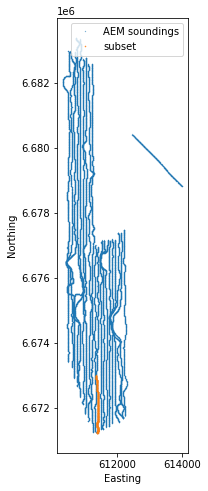

In [3]:
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.plot(data['flightlines']['utmx'], data['flightlines']['utmy'], '.',  markersize=0.5, label = "AEM soundings" )
ax1.set_aspect('equal')


# define a subset

linenumber = 102901

idx_valid=np.logical_and(data["flightlines"]["line_no"] == linenumber,  
                          data["flightlines"]["utmy"]<6.673e6)

ax1.plot(data['flightlines']['utmx'][idx_valid], 
             data['flightlines']['utmy'][idx_valid], 
             r'.',  markersize=1.0, label = "subset" )


ax1.legend()
ax1.set_xlabel("Easting")
ax1.set_ylabel("Northing")

### plot the actual sounding data dB/dt data 

(1e-06, 0.001)

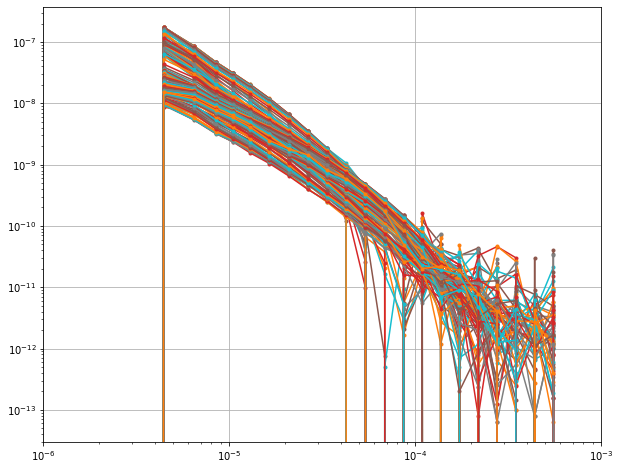

In [4]:
fig1, ax  = plt.subplots(figsize=(10, 8))
ax.plot(data["model_info"]["gate times for channel 1"],
        data["layer_data"]["dbdt_ch1gt"].values[idx_valid,:].T,
        ".-")
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid()
ax.set_xlim([1e-6, 1e-3])